In [2]:
class Document(object):
    
    def __init__(self,id, title, authors, venue, year, n_citation, references =[], abstract ='', *args, **kwargs ):
        self.id = id
        self.title = title
        self.authors = authors
        self.venue = venue
        self.year = year
        self.n_citation = n_citation
        self.references = references
        self.abstract = abstract
        
    def __str__(self):
        return str(self.id)

    def __hash__(self):
        return hash(str(self))
    
    def __repr__(self):
        return str(self.id)

    

<Figure size 576x432 with 0 Axes>

{1: 0.05321791744040751,
 2: 0.04795210472197557,
 3: 0.038339624234190336,
 4: 0.03452581664326873,
 5: 0.05950750079994211,
 6: 0.03452581664326873,
 7: 0.03607366640504419,
 8: 0.04270618497331012,
 9: 0.031890372366283254,
 10: 0.023593963812959518,
 11: 0.02780369046741993,
 12: 0.02937873319301529,
 13: 0.023593963812959518,
 14: 0.023593963812959518,
 15: 0.043385406670780426,
 16: 0.026284836264370903,
 17: 0.03295980347315064,
 18: 0.023593963812959518,
 19: 0.03295980347315064,
 20: 0.03824979732325269,
 21: 0.03353796297394517,
 22: 0.03499561632513178,
 23: 0.024711906327241805,
 24: 0.024711906327241805,
 25: 0.02764980770375685,
 26: 0.023593963812959518,
 27: 0.03273398076384458,
 28: 0.03047962358729351,
 29: 0.03691643664444136,
 30: 0.026531865189474563}

Enter a top number: 5


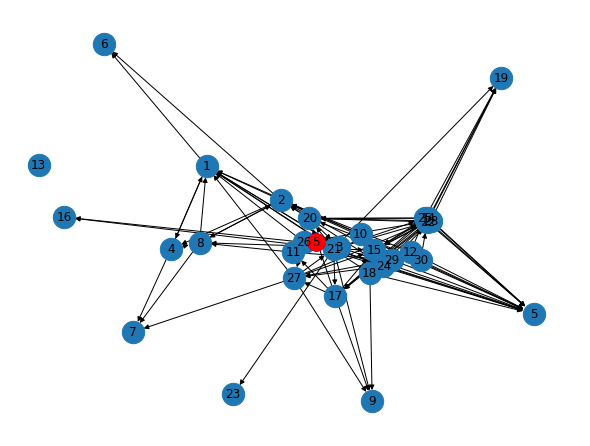

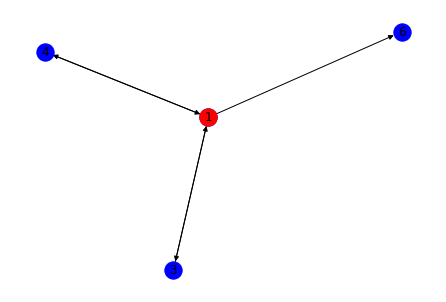

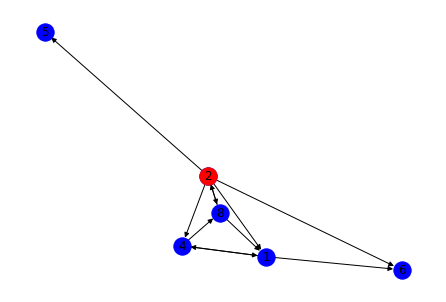

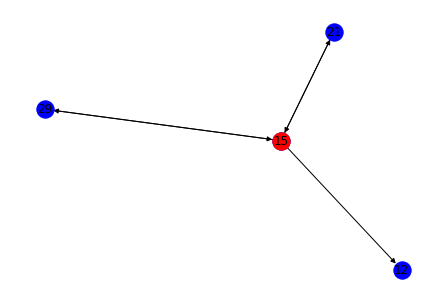

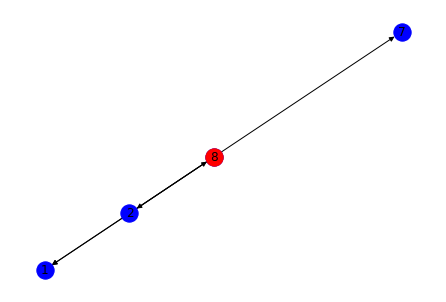

Le graph Ginf des 5 top noeuds


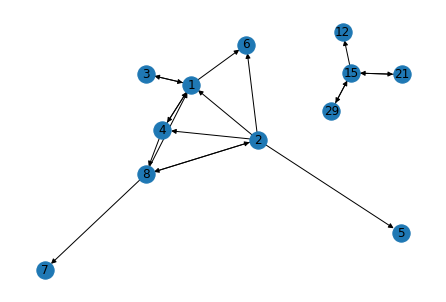

In [10]:
# importing networkx 
import networkx as nx 

import json 

from operator import itemgetter

# importing matplotlib.pyplot 
import matplotlib.pyplot as plt 

from numpy import random

# to display all outputs (not only the last one))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import collections

import pandas as pd

import numpy as np

# to center figure on display
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

from collections import namedtuple


# function that return the "nb" top first elements
def sort_top(pr,top_nb):
    sorted_pr = sorted(pr.items(), key=lambda kv: kv[1], reverse=True)
    sorted_top =[]
    for i in range(top_nb):
        sorted_top.append(sorted_pr[i])
        
    return sorted_top

# create an empty graph (DiGraph: directed graph)
G = nx.DiGraph()


# read input file
data = [json.loads(line) for line in open('db_v10_example_modified_ids.json', 'r')]


# browse the file, extract each object of type "Document" and assign it to a node
for document in data:
    
    # Parse JSON into an object with attributes corresponding to dict keys.
    
    # With json.loads(document), I'm calling json.loads with a dictionary as input (which gives an error).

    # I can fix it as follows:
    
    s1 = json.dumps(document)
    
    j= json.loads(s1)
    
    u = Document(**j)
    
    G.add_node(u)


# add the links (edges between documents)
for node in G:
    if hasattr(node, 'references'):
        for i in node.references:
            for d in G:
                if (i == (d.id)) and (d != node):
                    G.add_edge(node,d)

# specify figure size
plt.figure(3,figsize=(8,6))                     
nx.draw(G,node_size=500, with_labels=True)

# apply page rank algorithm
pr=nx.pagerank(G,0.4) 
pr

# Declare Ginf graph
Ginf = nx.DiGraph()


if __name__=='__main__':
    
        nb = int(input('Enter a top number: '))
        
        #sort pr: returns the nb top pr
        test = sort_top(pr,nb)

        for i in range(nb):

            # Create ego graph
            # When unidirected=False : only successors of the nodes are drawn
            # When unidirected=True : successors and predecessors of the nodes are drawn
            hub_ego=nx.ego_graph(G,test[i][0],undirected=False)

            
            #Update Ginf graph
            Ginf.update(hub_ego)
            
            # Draw graph ego
            pos=nx.spring_layout(hub_ego)
            nx.draw(hub_ego,pos,node_color='b',node_size=300,with_labels=True)

            # Draw ego as large and red
            nx.draw_networkx_nodes(hub_ego,pos,nodelist=[test[i][0]],node_size=300,node_color='r')
            plt.show()
            
print('Le graph Ginf des ' + str(nb) +' top noeuds')
nx.draw(Ginf,with_labels=True)
plt.show()



In [4]:
# return titles by author
def search_by_author(g,author):
    titles=[]
    for node in g:
        if hasattr(node, 'authors') and author in node.authors and (not node.title in titles):
            titles.append(node.title)
    return titles

# return all titles
def search_titles(g):
    titles=[]
    for node in g:
        if hasattr(node, 'title'):
            if not node.title in titles:
                titles.append(node.title)
    return titles

#return all authors
def search_authors(g):
    authors=[]
    for node in g:
        if hasattr(node, 'authors'):
            for i in node.authors:
                if not i in authors:
                    authors.append(i)
    return authors

def search_venues(g):
    venues=[]
    for node in g:
        if hasattr(node, 'venue'):
            if not node.venue in venues:
                venues.append(node.venue)
    return venues

#return all abstracts
def search_abstracts(g):
    abstracts=[]
    for node in g:
        if hasattr(node, 'abstract') and (not node.abstract in abstracts):
            abstracts.append(node.abstract)
    return abstracts

titles = search_by_author(Ginf,"Makoto Satoh")
print("Les titres réalisés par Makoto Satoh sont:")
print(titles)


titles = search_titles(Ginf)
print("Les titres de ce Ginf sont:")
print(titles)

authors = search_authors(Ginf)
print(authors)



Les titres réalisés par Makoto Satoh sont:
['Preliminary Design of a Network Protocol Learning Tool Based on the Comprehension of High School Students: Design by an Empirical Study Using a Simple Mind Map']
Les titres de ce Ginf sont:
['Reasonig about Set-Oriented Methods in Object Databases.', 'Development of Remote Monitoring and Control Device for 50KW PV System Based on the Wireless Network', 'Preliminary Design of a Network Protocol Learning Tool Based on the Comprehension of High School Students: Design by an Empirical Study Using a Simple Mind Map', 'COMPARING GNG3D AND QUADRIC ERROR METRICS METHODS TO SIMPLIFY 3D MESHES', 'Comparison of GARCH, Neural Network and Support Vector Machine in Financial Time Series Prediction', 'A methodology for the physically accurate visualisation of roman polychrome statuary', 'Improved Secret Image Sharing Method By Encoding Shared Values With Authentication Bits', 'Towards Elastic Component-Based Cloud Applications', 'The expressive space of ID

In [5]:
from nltk.tokenize import sent_tokenize

import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import numpy as np
np.random.seed(2018)
import nltk
nltk.download('punkt')
nltk.download('wordnet')

# initializing stemmer
stemmer = SnowballStemmer('english')

abstracts = search_abstracts(Ginf)

# convert abstracts into dict with one key in order to apply lda algorithm
# the key here is: "abstract"
documents = {"abstracts": abstracts[0:]}

# Certain parts of English speech, like conjunctions (“for”, “or”) or the word “the” are meaningless to a topic model.
# These terms are called stop words and need to be removed from our token list.
# function that lematizes and stemms
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenization segments a document into its atomic elements. (into words)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

processed_docs = list(map(preprocess,documents['abstracts']))

# print the first 4 preprocessed elements
print(processed_docs[:4])

# Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

#Filter out tokens
dictionary.filter_extremes(no_below=0)

#transform our dict into a bag of words
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# display occurence of words in every document
for doc in bow_corpus:
    for i in range(len(doc)):
        print("Word {} (\"{}\") appears {} time.".format(doc[i][0], 
                                               dictionary[doc[i][0]],doc[i][1]))



[nltk_data] Downloading package punkt to /home/midovsky/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to /home/midovsky/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[[], ['purpos', 'studi', 'develop', 'learn', 'tool', 'high', 'school', 'student', 'studi', 'scientif', 'aspect', 'inform', 'communic', 'work', 'specif', 'focus', 'basic', 'principl', 'network', 'proto', 'col', 'develop', 'learn', 'tool', 'tool', 'give', 'student', 'hand', 'experi', 'help', 'understand', 'basic', 'principl', 'network', 'protocol'], ['articl', 'appli', 'garch', 'model', 'instead', 'arma', 'model', 'compar', 'standard', 'forecast', 'intern', 'includ', 'asian', 'stock', 'market', 'indic', 'model', 'evalu', 'perform', 'metric', 'criteria', 'experiment', 'result', 'show', 'superior', 'garch', 'model', 'compar', 'standard', 'forecast', 'intern', 'stock', 'market', 'indic'], ['paper', 'describ', 'design', 'implement', 'methodolog', 'visualis', 'hypothet', 'virtual', 'reconstruct', 'roman', 'polychrom', 'statuari', 'research', 'purpos', 'methodolog', 'intend', 'attempt', 'visualis', 'simpli', 'believ', 'physic', 'accur', 'approach', 'accur', 'represent', 'polychrom', 'statuari'

In [6]:
# apply lda model
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=4, id2word=dictionary, passes=20)

# num_words: number of relevant words in every topic
for idx, topic in lda_model.print_topics(num_words=5): #or -1 as parameter
    print('Topic: {} \nWords: {}'.format(idx, topic))
    
# To print the % of topics a document is about, do the following:
lda_model[bow_corpus[1]] # bow_corpus[0] means the first document.

Topic: 0 
Words: 0.005*"model" + 0.005*"methodolog" + 0.005*"standard" + 0.005*"develop" + 0.005*"studi"
Topic: 1 
Words: 0.027*"methodolog" + 0.021*"accur" + 0.021*"visualis" + 0.015*"research" + 0.015*"mean"
Topic: 2 
Words: 0.029*"user" + 0.029*"model" + 0.022*"approach" + 0.022*"perform" + 0.015*"aspect"
Topic: 3 
Words: 0.023*"tool" + 0.023*"kind" + 0.023*"integr" + 0.023*"equat" + 0.016*"develop"


[(3, 0.97906506)]

In [7]:
# to display the topics of all documents
for doc in bow_corpus:
    lda_model[doc]

[(0, 0.25), (1, 0.25), (2, 0.25), (3, 0.25)]

[(3, 0.97906506)]

[(2, 0.97853625)]

[(1, 0.9928141)]

[(2, 0.9880239)]

[(3, 0.9865438)]

In [8]:
# print the topic number + percentage
print(lda_model.print_topics(num_topics=3, num_words=3))

[(2, '0.029*"user" + 0.029*"model" + 0.022*"approach"'), (0, '0.005*"model" + 0.005*"methodolog" + 0.005*"standard"'), (3, '0.023*"tool" + 0.023*"kind" + 0.023*"integr"')]


In [9]:
# to check where a document can be classified
for index, score in sorted(lda_model[bow_corpus[1]], key=lambda tup: -1*tup[1]): # exemple doc num 1
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9790648221969604	 
Topic: 0.023*"tool" + 0.023*"kind" + 0.023*"integr" + 0.023*"equat" + 0.016*"develop" + 0.016*"studi" + 0.016*"principl" + 0.016*"student" + 0.016*"learn" + 0.016*"discret"
